<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/phy_lab_capacitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]]
[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[10.          8.83233334  7.67148849  6.5234643   5.39271296  4.28160304
  3.19013399  2.11593637  1.0545578   0.        ]


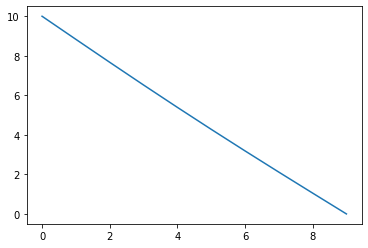

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

### graph with n linear nodes
n = 10

Adjacency_Matrix = np.zeros((n,n))

i = np.arange(n-1)

Adjacency_Matrix[i,i+1] = 1
Adjacency_Matrix[i+1,i] = 1

print( Adjacency_Matrix )
Degree = np.diag(np.sum(Adjacency_Matrix, axis=1))
Δ_graph = Degree - Adjacency_Matrix
print( Δ_graph )


u_0    = np.zeros(n)
u_0[0] = 10
dt     = 0.1
T      = np.arange(0, 10, dt)

print(u_0)

for i in range(300):
    u_0 -= Δ_graph @ u_0 * dt
    u_0[0]  = 10
    u_0[-1] = 0

print(u_0)

plt.plot(np.arange(len(u_0)), u_0)
plt.show()

In [ ]:
def grad(s):
    gradient = np.empty([s.ndim] + list(s.shape), dtype=s.dtype)
    for i in range(s.ndim):
        gradient[i] = np.gradient(s, axis=i)
    return gradient

In [ ]:
#2D adjacency matrix
p = 20 # points
h = 1
x = np.arange(0,p,h)
XY = np.meshgrid(x,x)
n = p**2
Adjacency_Matrix = np.zeros((n,n))

#i = np.arange(n-1)
for i in range(n):
  if (i+1 < n) and ( ((i+1) % p) != 0):
    Adjacency_Matrix[i,i+1] = 1
    Adjacency_Matrix[i+1,i] = 1
  if (i+p) <= (n-1):
    Adjacency_Matrix[i,i+p] = 1 #the point above in grid
  if (i-p) >= 0:
    Adjacency_Matrix[i,i-p] = 1 #the point below

print( 'Adjacency_Matrix')
print( Adjacency_Matrix )

Adjacency_Matrix
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
Degree = np.diag(np.sum(Adjacency_Matrix, axis=1))
print('Degree:')
print(Degree)

Degree:
[[2. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 2.]]


In [ ]:
Δ_graph = Degree - Adjacency_Matrix
print('Δ_graph:')
print( Δ_graph )

Δ_graph:
[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  3. -1. ...  0.  0.  0.]
 [ 0. -1.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  3. -1.  0.]
 [ 0.  0.  0. ... -1.  3. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]


In [ ]:
u_0    = np.zeros(n)
dt     = .1
u_0[301:319]  =  1 #setting voltage for capacitor plate, positive
u_0[81:99]    = -1 #negative plate

frames = np.zeros((100,p,p))
for j in range(100):
    u_0 -= Δ_graph @ u_0 * dt
    u_0[301:319]  = 1
    u_0[81:99] = -1
    frames[j] = np.reshape(u_0,(p,p)) #for animation




Potential = np.reshape(u_0,(p,p))
E_field = -1*grad(Potential)
E_field_frames = -1 * grad(frames)


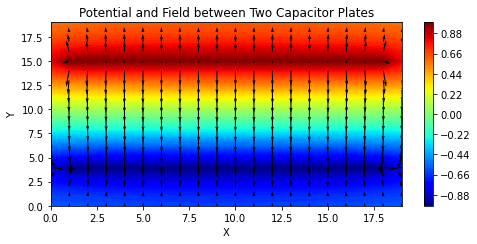

In [ ]:
fig, ax = plt.subplots()


plt.contourf(XY[0],XY[1],Potential,levels=100)
plt.colorbar()
plt.set_cmap('jet')
ax.quiver(XY[0],XY[1],E_field[1],E_field[0],);
ax.set_title('Potential and Field between Two Capacitor Plates');
ax.set_xlabel('X');
ax.set_ylabel('Y');
plt.show()

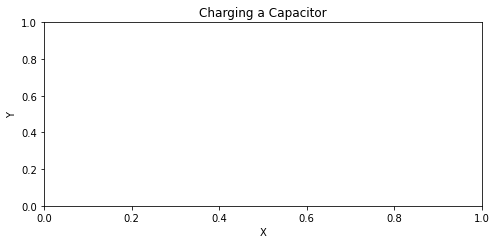

In [ ]:

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Create a figure and a set of subplots
fig, ax = plt.subplots()
ax.set_title('Charging a Capacitor');
ax.set_xlabel('X');
ax.set_ylabel('Y');
# animation function. This is called sequentially


In [ ]:
def animate(i):
    ax.clear()
    ax.contourf(frames[i], cmap='jet',levels=100)
    ax.quiver(XY[0],XY[1],E_field_frames[0,i,:,:],E_field_frames[1,i,:,:], );

In [ ]:
# Call animate method
ani = animation.FuncAnimation(fig, animate, 100, interval=30, blit=False,repeat=False)


In [ ]:
HTML(ani.to_html5_video()) #should take around 50s